# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
data.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated target variable statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}\n".format(std_price)

# Calculate statistics for feature variables and show
feature_descriptions = [('average number of rooms', 'RM'), 
                        ('percentage of "working poor"', 'LSTAT'), 
                        ('primary/secondary student-teacher ratio', 'PTRATIO')]
statistics = [('Min', np.min), ('Max', np.max), ('Mean', np.mean), ('Median', np.median), ('Std', np.std)]
for feature, fcode in feature_descriptions:
    print feature.title()
    print '-'*len(feature)
    for stat, f in statistics:
        if stat in ['Min', 'Max']:
            print '  {}: {}'.format(stat, f(data[fcode]))
        else:
            print '  {}: {:,.3f}'.format(stat, f(data[fcode]))
    print ''

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13

Average Number Of Rooms
-----------------------
  Min: 3.561
  Max: 8.398
  Mean: 6.240
  Median: 6.185
  Std: 0.643

Percentage Of "Working Poor"
----------------------------
  Min: 1.98
  Max: 37.97
  Mean: 12.940
  Median: 11.690
  Std: 7.075

Primary/Secondary Student-Teacher Ratio
---------------------------------------
  Min: 12.6
  Max: 22.0
  Mean: 18.517
  Median: 19.100
  Std: 2.109



### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

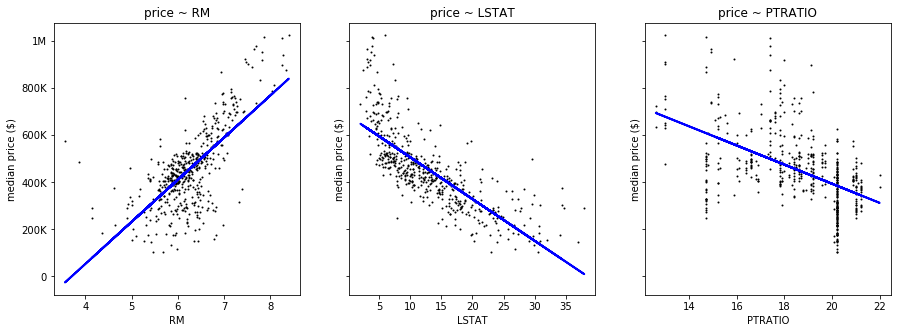

In [3]:
# plotting a trendline for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,5))
for i, col in enumerate(features.columns):
    plt.sca(axes[i])
    fit = np.polyfit(features[col], prices, deg=1)
    # ax[i].scatter(features[col],  prices)
    plt.plot(features[col], prices, 'o', color='black', markersize=1)
    plt.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=2) 
    plt.title('price ~ '+ str(col))
    plt.xlabel(col)
    plt.ylabel('median price ($)')
plt.setp(axes, yticklabels=['', '0']+[str(x)+'K' for x in range(200, 1000, 200)]+['1M', ''])
plt.show()

**Answer:** I believe `RM` is directly proportional to `MEDV` (increase in feature leads to increae in target variable). As the number of rooms increases, the house usually gets bigger, and it's usually a rule of capitalism that you pay more for more/bigger things. 

I expect `LSAT` is inversely proportional to `MEDV`. A higher percentage of working class families in a neighborhood implies that the average family there has less buying power, in turn implying that the house prices would be lower, assuming families want to stay within their budgets. (And fortunately, this data was recorded before the predatory lending practices that led to the Great Recession.) Interestingly, the distribution shows quadratic or perhaps exponential decay trends 

Finally, I think `PTRATIO` is inversely related to `MEDV`. Low student-teacher ratios implies more teachers behind hired for the same amount of students. If we can assume that this is funded by local property tax, this immediately implies higher house values in that neighborhood. And even if that's not the source of funding, I would expect better schools (in this case, determined by low student-teacher ratios) to increase neighborhood property values. 

This intuition is justified in each case by the positive slope of the trendline in `price ~ RM` and the trendline's negative slope in `price ~ LSTAT` and `price ~ PTRATIO`. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** I consider this model to have successfully captured the variation of the target variable. Each prediction is within 1.1 of the true value, and a majority are quite close (within 0.5). Our intuition is confirmed since this model has a high coefficient of determination, R<sup>2</sup>, of 0.923, indicating it does capture the target variable well. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.8, random_state=5)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer:** If you train a learning algorithm on the entire dataset, you have no way to test if your predictions are accurate in the absense of other/new data. Also, by fitting a model to your entire dataset there is a danger of overfitting to the idiosyncrasies of your sample rather than the general trend. Then, when trying to predict new data, the model may be inaccurate.  

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

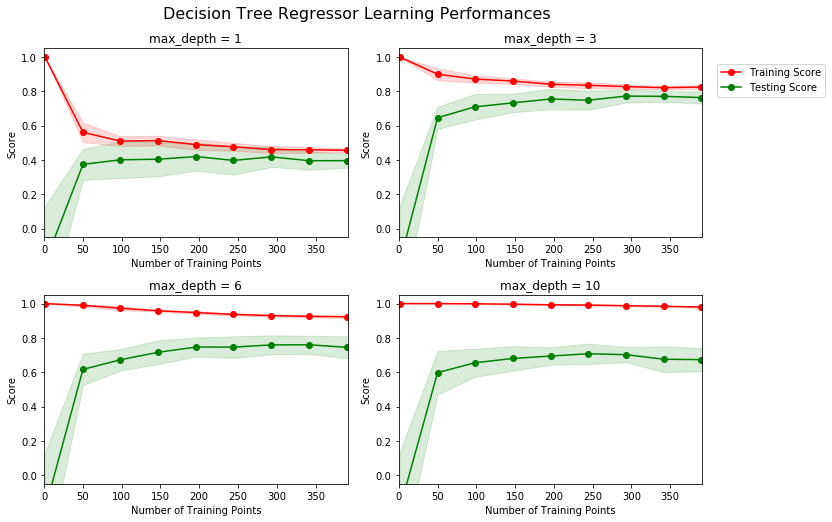

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer:** I chose the graph with the maximum depth equal to three (`max_depth = 3`). After increasing from 0 training points which has a trivial training score of 1.0, as more training points are added, the training score curve seems to decrease to around 0.8. Conversely, as more training points are added, the testing score curve increases to about 0.75. After about 350 training points, there doesn't seem to be any additional benefit from adding more training points. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

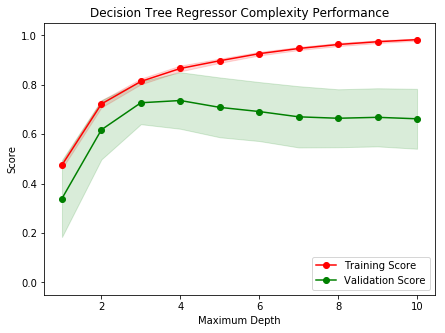

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer:** When the validation and training scores are low, say below 0.5 (arbitrarily chosen), I say that the model suffers from high bias, as the model is not as able to predict the true value. This is indicated on the graph by the low values of the green and red dots. A model suffers from high variance, or overfitting, when the training score is high but the validation score is low. This would be indicated by a large gap between the red dots at top and the green dots on the bottom. At a maximum depth of 1, the model suffers from high bias, with a validation score of ~0.35 and a training score of ~0.5. At a maximum depth of 10, the validation score is better at ~0.6 but is decreasing with each maximum depth. Further, while the training score is at basically 1.0, there is a large gap between it and the validation score. This indicates overfitting causing a inability to generalize to new data, so I would say the model suffers from high variance. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer:** Based on the above graph, I would say that a maximum depth of 4 would best generalize to unseen data since we must pick the `max_depth` that maximizes the validation R<sup>2</sup> score. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer:** Grid search technique is parameter selection technique for a learning algorithm (a parameter for a learning algorithm that is not directly learned is called a "hyper-parameter") [<sup>[1]</sup>](http://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator). It cycles through a finite set of parameter values, or a finite Cartesian product of parameter values for multiple parameters, recording the accuracy attained from each. You may then select the best performing set of parameter values to optimize the classifer. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer:** K-fold cross-validation is the technique of dividing the data into k equally sized sets, or "folds", holding one fold back for validation, training the model on the k-1 sets, obtaining a measure-of-fit for that fold, then repeating the procedure for each k. An average of the goodness-of-fit is then obtained and returned as the validation score.  When used with grid search, the technique allows you to be confident that the parameters selected are optimized for the entire data set, rather than tuned to the idiosyncrasies of the particular training set you selected. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful! The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer:** The optimal model has a maximum depth of 4, which is different from my guess in Question 6 of 3. However, I was deciding between a max depth of 3 or 4, so I suppose the R<sup>2</sup> score function is more responsive to a decrease in bias than an increase in variance.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,931.58
Predicted selling price for Client 2's home: $235,620.00
Predicted selling price for Client 3's home: $922,740.00


**Answer:** I would recommend the client round up the predicted selling price to the nearest \$50K. Not only is there necessarily variability and/or uncertainty in a predicted selling price, but also there is no harm in starting high and being negiotated down in order to pocket a little more cash (and humans respond to round numbers better for some reason). For example, I would suggest Client 1 to sell for $450K and see what buyer response there is. You can also lower it closer to the predicted/suggested selling prices later. 

These prices do seem reasonable. As number of rooms would intuitively heavily factor in the price of a home, and the maximum average number of rooms is a little over 8, it makes sense that Client 3's home would be rated as very expensive, especially with the low neighborhood poverty level and student-teacher ratio. Conversely, Client 2 has a smaller house, with higher neighborhood poverty levels and student-teacher ratios, so the home should be rated as less expensive. Finally, Client 1's house is slightly bigger, but seems to be located in a much more prosperous neighborhood with better schools (almost as good as Client 3's). The location and average house size fits with an averagely-priced home for the dataset. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answer:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer:** There certainly is some variability of in the different trials. $26.7K is a new car for a family, so certainly the predictions should not be taken as fact and lose a little of their robustness. But overall, I believe the model could be used in a real life setting. The features do give indications of a home, however more specific information to individual homes could be collected, such as floor space of a given home as opposed to the average room size in the neighborhood. Further on that feature, while number of rooms might give an indication of land area the house sits on in an urban setting, in a rural area it might not have no bearing. Frequently in rural areas the land the home sits on has a large impact on home price. Similarly, there might only be one school in a rural city and no variability in the percentage of working poor since the city isn't big enough to support multiple neighborhoods. However, I believe that the constructed model could be used in a real-world, urban setting. Preferences in home buying hasn't changed overmuch since 1978, and new/more current data could easily be added to the dataset to increase predictive power. 